# Tarea 4

In [316]:
Pkg.add("PyPlot")
Pkg.add("SymPy")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [317]:
using PyPlot;
plt = PyPlot;
using SymPy;
sm = SymPy;

# Ejercicio 1 

## Método de Newton 

La siguiente celda define la función $solucion(x)$, que devuelve la raíz de la función; es decir, devuelve el $x_0$ tal que $f(x_0) = 0$, con precisión de $1x10^{-10}$

In [318]:
function newton(x) #x0 es el valor para comenzar la iteración
    prec = 1e-10   # Defino la precisión deseada
    f = x^3 - x^2 -x -1    #Defino el polinomio
    #Defino arreglos vacíos para vacíar la información en ellos
    Ax = []
    Af = []
    An = []
    As = []
    B = []
    j=1         #Contador
    while abs(f) > prec      #Ciclo while mientras la sustitución de la raíz en el polinomio
                             #sea mayor a la precisión
        f = x^3 - x^2 -x -1 
        df = 3x^2-2x-1       #Derivada del polinomio
        x = x - f/df         #Iteracion de Newton
        push!(Ax,x)          #Agregar cada paso, la x al arreglo Ax
        push!(Af,f)          #Agregar cada paso, la f al arreglo Af
        push!(An,j)          #Agregar cada paso, la n al arreglo Af
        j = j+1
    end
    As = (Ax-x)/x            #Arreglo del error relativo
    push!(B,x)               #Le agrego a la primera entrada de B la raíz final
    push!(B,Ax)              #Le agrego a la segunda entrada de B el arreglo Ax
    push!(B,Af)              #Le agrego a la tercera entrada de B el arreglo Af
    push!(B,As)              #Le agrego a la cuarta entrada de B el arreglo As
    push!(B,An)              #Le agrego a la quinta entrada de B el arreglo An
   return B
end;

In [319]:
println("Raiz= ", newton(4)[1])     #que imprima la primer entrada de B, es decir, la raíz
println("Sustitucion= ", newton(4)[3][length(newton(4)[3])]) #que imprima la tercera entrada de B, es decir, la sustitución

Raiz= 1.8392867552141612
Sustitucion= 2.220446049250313e-16


La siguiente celda define la función $Cuatro(x_1,x_2.x_3,x_4)$, que grafica la sucesión de pasos que realiza la función $newton(x_1)$, ... , $newton(x_4)$ para $x$ y $f(x)$

In [320]:
function Cuatro(x1,x2,x3,x4)
    C = [x1,x2,x3,x4]
    Ax = []
    Af = []
    As = []
    An = []
    #Inicia ciclo para cada entrada x_i
    for i in C
        push!(Ax,newton(i)[2])
        push!(Af,newton(i)[3])
        push!(As,newton(i)[4])
        push!(An,newton(i)[5])
    end
    #Grafico An vs. Ax para cada entrada x_i
    fig1 = figure("Grafica 1", figsize=(8,3))
    plt.scatter(An[1],Ax[1], label=x1, alpha=0.5)
    plt.scatter(An[2],Ax[2], label=x2, alpha=0.5)
    plt.scatter(An[3],Ax[3], label=x3, alpha=0.5)
    plt.scatter(An[4],Ax[4], label=x4, alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("x_n")
    plt.xlabel("n")
    plt.title("Gráfica de sucesion n vs. x_n")
    #Grafico An vs. As para cada x_i
    fig1 = figure("Grafica 2", figsize=(8,3))
    plt.scatter(An[1],As[1], label=x1, alpha=0.5)
    plt.scatter(An[2],As[2], label=x2, alpha=0.5)
    plt.scatter(An[3],As[3], label=x3, alpha=0.5)
    plt.scatter(An[4],As[4], label=x4, alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("Error_n(x)")
    plt.xlabel("n")
    plt.title("Gráfica de sucesion n vs. Error_n(x)")
    end;

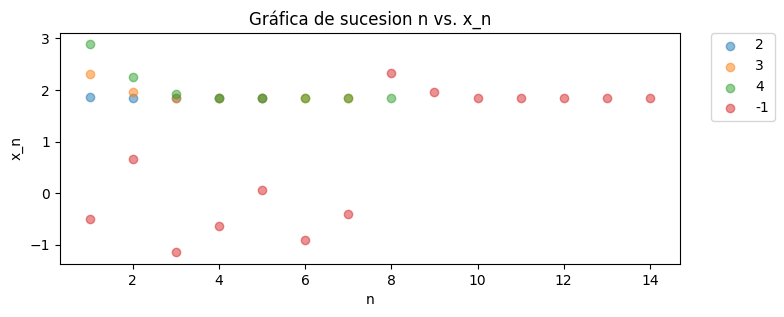

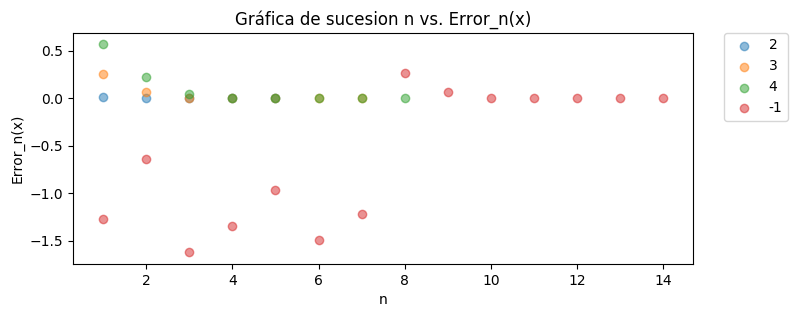

PyObject <matplotlib.text.Text object at 0x13da3f550>

In [321]:
Cuatro(2,3,4,-1)

## Método de Bisección 

In [322]:
function biseccion(a,b)
    prec = 1e-5
    Ap = []
    Af = []
    An = []
    As = []
    B = []
    j=1
    p = (a+b)/2
    f(x) = x^3-x^2-x-1
    #método iterativo de bisección
    while abs(f(p)) > prec
        if  f(a)*f(p) > 0
            a = p
        end
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
        push!(Ap,p)
        push!(Af,f(p))
        push!(An,j)
        j = j+1
    end
    As = (Ap-p)/p
    push!(B,p)
    push!(B,Ap)
    push!(B,Af)
    push!(B,As)
    push!(B,An)
    return B   
end;

In [323]:
println("Raiz= ", biseccion(1,2.1)[1])
println("Sustitucion= ", biseccion(1,2.1)[3][length(biseccion(1,2.1)[3])])

Raiz= 1.8392879486083982
Sustitucion= 6.5282951258183175e-6


In [324]:
function cuatro2(x1,x2,x3,x4,x5,x6,x7,x8)
    C = [(x1,x2),(x3,x4),(x5,x6),(x7,x8)]
    Ap = []
    Af = []
    As = []
    An = []
    for i in 1:4
        #Agrego a las matrices definidad la correspondiente entrada de biseccion
        #evaluada en los x_i de entrada
        push!(Ap,biseccion(C[i][1],C[i][2])[2])
        push!(Af,biseccion(C[i][1],C[i][2])[3])
        push!(As,biseccion(C[i][1],C[i][2])[4])
        push!(An,biseccion(C[i][1],C[i][2])[5])
    end
    fig1 = figure("Grafica 1", figsize=(8,3))
    plt.scatter(An[1],Ap[1], label="a=x1, b=x2", alpha=0.5)
    plt.scatter(An[2],Ap[2], label="a=x3, b=x4", alpha=0.5)
    plt.scatter(An[3],Ap[3], label="a=x5, b=x6", alpha=0.5)
    plt.scatter(An[4],Ap[4], label="a=x4, b=x8", alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("x_n")
    plt.xlabel("n")
    plt.title("Gráfica de sucesion n vs. x_n")
    fig1 = figure("Grafica 2", figsize=(8,3))
    plt.scatter(An[1],As[1], label="a=x1, b=x2", alpha=0.5)
    plt.scatter(An[2],As[2], label="a=x3, b=x4", alpha=0.5)
    plt.scatter(An[3],As[3], label="a=x5, b=x6", alpha=0.5)
    plt.scatter(An[4],As[4], label="a=x4, b=x8", alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("Error_n(x)")
    plt.xlabel("n")
    plt.title("Gráfica de sucesion n vs. Error_n(x)")
end;

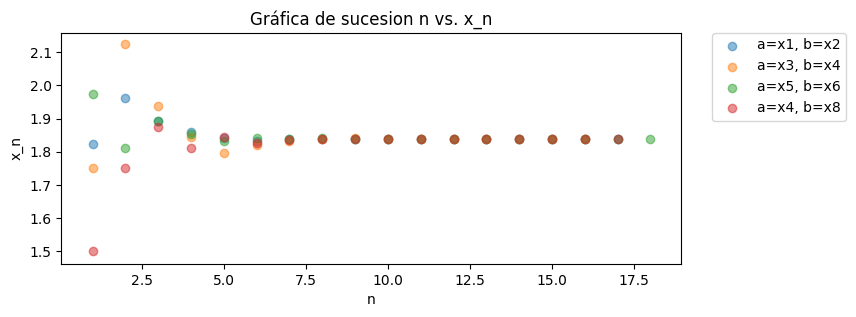

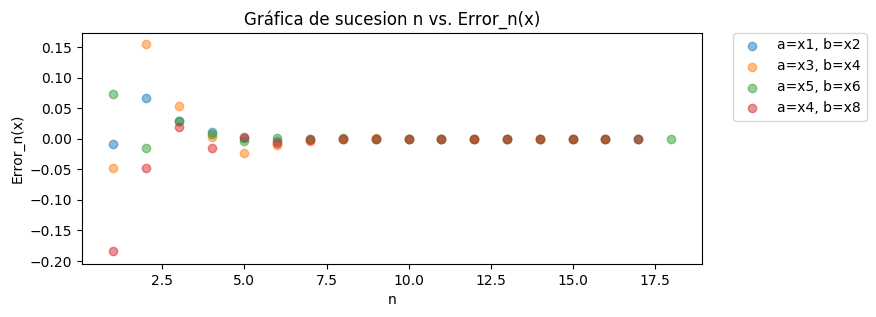

PyObject <matplotlib.text.Text object at 0x1285a16d0>

In [325]:
cuatro2(1,2.1,1,4,1,2.3,1,3)

## Ejercicio 2

### Inciso a

In [383]:
function symnewton(f, df, x0)
    x = x0
    prec = 1e-10               #Defino la precisión deseada
    while abs(f(x)) > prec      #Ciclo while mientras la sustitución de la raíz en el polinomio
                                #sea mayor a la precisión
        x = x - f(x)/df(x)         #Iteracion de Newton
    end
    return x
end;

In [384]:
symnewton(x->x^3,x->3x^2, 0.5)

0.0003383197422994321

### Inciso b

In [328]:
A = [1,1.1,1.1,1.2,1.1]
symnewton.(x->sin(x),x->cos(x), A)

5-element Array{Float64,1}:
  2.92357e-13
 -1.38172e-20
 -1.38172e-20
  3.14159    
 -1.38172e-20

### Inciso c 

In [330]:
function symnewton2(f, df, x0)
    x=symnewton.(f,df,x0)
    eps = 1e-5            #Defino la precisión deseada
    T=[]                    #Defino el arreglo en donde pondré las raíces revisadas
    dim1=length(x)
    for i in 1:dim1       #for para cada elemento del arreglo original x
        cont = 0
        for j in 1:(i-1)       #revisar todas las entradas anteriores a cada i
            if abs(x[i]-x[j]) > eps          #condicion que nos interesa (que difieran por
                                                #cierta cantidad prec)
                cont = cont + 1                #contador para compararlo después
            end    
        end    
        if cont == i-1              #Si al final del ciclo for, cont == i-1, significa que
                                    #x[i] cumple la condición para todos los términos
                                    #anteriores, y entonces sí lo tomamos en cuenta
            push!(T,x[i])         #agregar término al arreglo final
        end    
    end    
    T
end;

In [413]:
B = [0.5,0.6,1,0.6]
symnewton2(x->x^3,x->3x^2, B)

3-element Array{Any,1}:
 0.00033832 
 0.000405984
 0.000451093

### Inciso d

In [441]:
function symnewton3(f,x0)
    y = symbols("y")
    f = f(y)
    df = diff(f(y),y)
    lf = lambdify(f,[y])
    ldf = lambdify(df,[y])
    symnewton2(lf,ldf,x0)
    #symnewton2(f(y),diff(f(y),y),x0)
end

symnewton3 (generic function with 2 methods)

In [443]:
H=[1.,2.,2.,3.,4.]
symnewton3(x->x^3,H)[2]

0.0004009715464289565

In [444]:
typeof(ans)

Float64